<a href="https://colab.research.google.com/github/Mercymerine/24C_practicing/blob/main/Heart_disease_predicition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### IMporting Packages


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Getting Datasets


In [ ]:
#Getting datats from Kaggle
!pip install -q kaggle

In [ ]:
#Getting the dataset
!kaggle datasets download -d kamilpytlak/personal-key-indicators-of-heart-disease

Dataset URL: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease
License(s): CC0-1.0
personal-key-indicators-of-heart-disease.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zipfile_path = '/content/personal-key-indicators-of-heart-disease.zip'
csv_file = zipfile_path.replace('zip', '')
with zipfile.ZipFile(zipfile_path, 'r') as file:
  file.extractall()
  print('Done')

Done


In [ ]:

heart = pd.read_csv('/content/2020/heart_2020_cleaned.csv')
heart

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


### Data Cleaning

In [ ]:
heart.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [ ]:

heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [ ]:













heart.isnull().sum()

,0
HeartDisease,0
BMI,0
Smoking,0
AlcoholDrinking,0
Stroke,0
PhysicalHealth,0
MentalHealth,0
DiffWalking,0
Sex,0
AgeCategory,0


In [ ]:
heart.nunique()


,0
HeartDisease,2
BMI,3604
Smoking,2
AlcoholDrinking,2
Stroke,2
PhysicalHealth,31
MentalHealth,31
DiffWalking,2
Sex,2
AgeCategory,13


### Data Encoding

In [ ]:
heart['Diabetic'].unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

In [ ]:
#Applying label encoding to the target column

HeartDisease_encoding ={
    'Yes':1,

    'No':0}

heart['HeartDisease'] = heart['HeartDisease'].map(HeartDisease_encoding)
heart


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,0,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,0,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,0,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,0,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,0,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,0,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,0,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [ ]:
#Applyinng ordinal encoding to the diabetic columns where it is customize it
diabetes_encoding ={
    'Yes':2,
    'Yes (during pregnancy)':1.5,
    'No, borderline diabetes':1,
    'No':0
}
 #Apply the custom encdoding to the diabetic column
heart['Diabetic'] = heart['Diabetic'].map(diabetes_encoding)
heart



,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,2.0,Yes,Very good,5.0,Yes,No,Yes
1,0,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,0.0,Yes,Very good,7.0,No,No,No
2,0,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,2.0,Yes,Fair,8.0,Yes,No,No
3,0,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,0.0,No,Good,6.0,No,No,Yes
4,0,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,0.0,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,2.0,No,Fair,6.0,Yes,No,No
319791,0,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,0.0,Yes,Very good,5.0,Yes,No,No
319792,0,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,0.0,Yes,Good,6.0,No,No,No
319793,0,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,0.0,No,Good,12.0,No,No,No


In [ ]:
# Applying ordianl encoding to the age column
age_order = ['18-24', '25-29', '30-34', '35-39', '40-44',
             '45-49', '50-54', '55-59', '60-64', '65-69',
             '70-74', '75-79', '80 or older']

# Convert age categories into ordinal encoded values based on the order
heart['AgeCategory'] = heart['AgeCategory'].apply(lambda x: age_order.index(x))
heart



,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,Yes,No,No,3.0,30.0,No,Female,7,White,2.0,Yes,Very good,5.0,Yes,No,Yes
1,0,20.34,No,No,Yes,0.0,0.0,No,Female,12,White,0.0,Yes,Very good,7.0,No,No,No
2,0,26.58,Yes,No,No,20.0,30.0,No,Male,9,White,2.0,Yes,Fair,8.0,Yes,No,No
3,0,24.21,No,No,No,0.0,0.0,No,Female,11,White,0.0,No,Good,6.0,No,No,Yes
4,0,23.71,No,No,No,28.0,0.0,Yes,Female,4,White,0.0,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,Yes,No,No,7.0,0.0,Yes,Male,8,Hispanic,2.0,No,Fair,6.0,Yes,No,No
319791,0,29.84,Yes,No,No,0.0,0.0,No,Male,3,Hispanic,0.0,Yes,Very good,5.0,Yes,No,No
319792,0,24.24,No,No,No,0.0,0.0,No,Female,5,Hispanic,0.0,Yes,Good,6.0,No,No,No
319793,0,32.81,No,No,No,0.0,0.0,No,Female,1,Hispanic,0.0,No,Good,12.0,No,No,No


In [ ]:
#Applying one hot encoding
heart = pd.get_dummies(heart, drop_first=True).astype(int)
heart

,HeartDisease,BMI,PhysicalHealth,MentalHealth,AgeCategory,Diabetic,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,...,Race_Other,Race_White,PhysicalActivity_Yes,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,0,16,3,30,7,2,5,1,0,0,...,0,1,1,0,0,0,1,1,0,1
1,0,20,0,0,12,0,7,0,0,1,...,0,1,1,0,0,0,1,0,0,0
2,0,26,20,30,9,2,8,1,0,0,...,0,1,1,1,0,0,0,1,0,0
3,0,24,0,0,11,0,6,0,0,0,...,0,1,0,0,1,0,0,0,0,1
4,0,23,28,0,4,0,8,0,0,0,...,0,1,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27,7,0,8,2,6,1,0,0,...,0,0,0,1,0,0,0,1,0,0
319791,0,29,0,0,3,0,5,1,0,0,...,0,0,1,0,0,0,1,1,0,0
319792,0,24,0,0,5,0,6,0,0,0,...,0,0,1,0,1,0,0,0,0,0
319793,0,32,0,0,1,0,12,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:

heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HeartDisease          319795 non-null  int64
 1   BMI                   319795 non-null  int64
 2   PhysicalHealth        319795 non-null  int64
 3   MentalHealth          319795 non-null  int64
 4   AgeCategory           319795 non-null  int64
 5   Diabetic              319795 non-null  int64
 6   SleepTime             319795 non-null  int64
 7   Smoking_Yes           319795 non-null  int64
 8   AlcoholDrinking_Yes   319795 non-null  int64
 9   Stroke_Yes            319795 non-null  int64
 10  DiffWalking_Yes       319795 non-null  int64
 11  Sex_Male              319795 non-null  int64
 12  Race_Asian            319795 non-null  int64
 13  Race_Black            319795 non-null  int64
 14  Race_Hispanic         319795 non-null  int64
 15  Race_Other            319795 non-n

### Data Analysis

<Axes: >

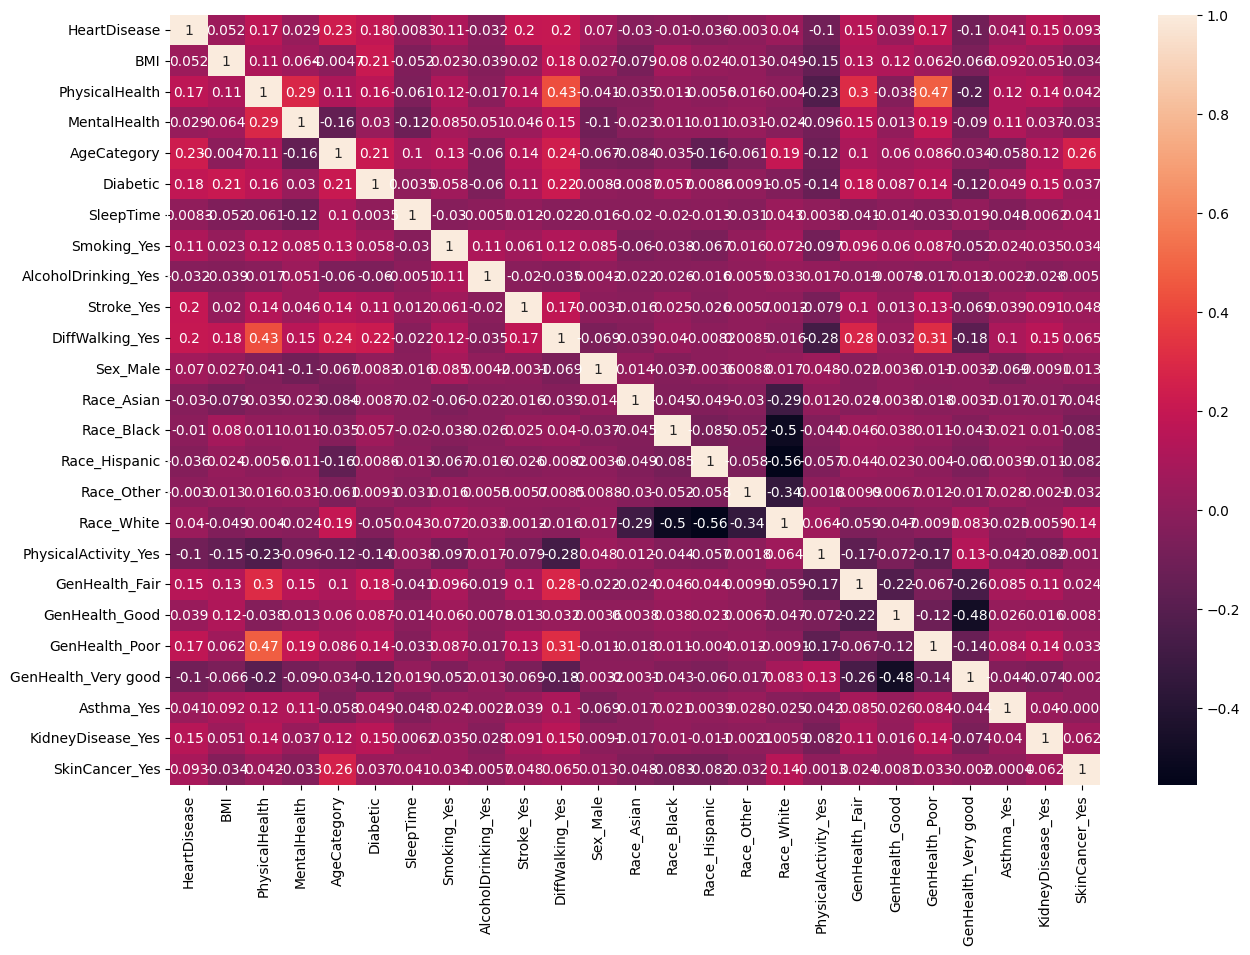

In [ ]:
#Creating a heatmap
plt.figure(figsize=(15,10))
sns.heatmap(heart.corr(), annot=True)

Most correlated:Stroke, walking, mental health

### Splitting the dataset into training and test data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
heart2= heart.head(1000)

In [ ]:
X = heart2.drop('HeartDisease', axis=1)
y = heart2['HeartDisease']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Modelling

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

### Support Vector Machine

In [ ]:
svm = make_pipeline(StandardScaler(), SVC(C=0.9, kernel='poly', degree=5, class_weight='balanced'))
scores = cross_val_score(svm, X_train, y_train, cv=5, scoring='accuracy')
print(scores)
mean = scores.mean()
print(mean)


[0.81875 0.8375  0.825   0.84375 0.8375 ]
0.8325000000000001


### Evaluating the perfomance


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Fit the model on the training data
svm.fit(X_train, y_train)

# Predict on the test set
y_pred = svm.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

# Additional performance metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Test Accuracy: 0.83
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.96      0.91       171
           1       0.22      0.07      0.11        29

    accuracy                           0.83       200
   macro avg       0.54      0.51      0.51       200
weighted avg       0.77      0.83      0.79       200

Confusion Matrix:
 [[164   7]
 [ 27   2]]


# **KNN**


Supervised neighbors-based learning comes in two flavors: classification for data with discrete labels, and regression for data with continuous labels.

The principle behind nearest neighbor methods is to find a predefined number of training samples closest in distance to the new point, and predict the label from these. The number of samples can be a user-defined constant (k-nearest neighbor learning), or vary based on the local density of points (radius-based neighbor learning). The distance can, in general, be any metric measure: standard Euclidean distance is the most common choice. Neighbors-based methods are known as non-generalizing machine learning methods, since they simply “remember” all of its training data

Being a non-parametric method, it is often successful in classification situations where the decision boundary is very irregular.

## **Nearest Neighbors Classification**

Neighbors-based classification is a type of instance-based learning or non-generalizing learning: it does not attempt to construct a general internal model, but simply stores instances of the training data.

Classification is computed from a simple majority vote of the nearest neighbors of each point: a query point is assigned the data class which has the most representatives within the nearest neighbors of the point.

1. **KNeighborsClassifier:** implements learning based on the knearest neighbors of each query point, where k is an integer value specified by the user.

2. **RadiusNeighborsClassifier:** implements learning based on the number of neighbors within a fixed radius r of each training point, where r is a floating-point value specified by the user. In cases where the data is not uniformly sampled, radius-based neighbors classification in RadiusNeighborsClassifier can be a better choice. For high-dimensional parameter spaces, this method becomes less effective due to the so-called “curse of dimensionality”.






In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)
print(indices)
print(distances)

[[0 1]
 [1 0]
 [2 1]
 [3 4]
 [4 3]
 [5 4]]
[[0.         1.        ]
 [0.         1.        ]
 [0.         1.41421356]
 [0.         1.        ]
 [0.         1.        ]
 [0.         1.41421356]]


In [ ]:
from sklearn.neighbors import KDTree, BallTree
KDTree.valid_metrics
BallTree.valid_metrics



['euclidean',
 'l2',
 'minkowski',
 'p',
 'manhattan',
 'cityblock',
 'l1',
 'chebyshev',
 'infinity',
 'seuclidean',
 'mahalanobis',
 'hamming',
 'canberra',
 'braycurtis',
 'jaccard',
 'dice',
 'rogerstanimoto',
 'russellrao',
 'sokalmichener',
 'sokalsneath',
 'haversine',
 'pyfunc']

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5, weights='uniform', p=1))
scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
print(scores)
mean = scores.mean()
print(mean)



[0.84375 0.875   0.825   0.85    0.85   ]
0.8487500000000001


In [ ]:
# Fit the model on the training data
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

# Additional performance metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Test Accuracy: 0.815
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.94      0.90       171
           1       0.17      0.07      0.10        29

    accuracy                           0.81       200
   macro avg       0.51      0.51      0.50       200
weighted avg       0.76      0.81      0.78       200

Confusion Matrix:
 [[161  10]
 [ 27   2]]


In [ ]:
from sklearn.neighbors import RadiusNeighborsClassifier

In [ ]:
rnc = make_pipeline(StandardScaler(), RadiusNeighborsClassifier(radius=5.0))
scores = cross_val_score(rnc, X_train, y_train, cv=5, scoring='accuracy')
print(scores)
mean = scores.mean()
print(mean)

[nan nan nan nan nan]
nan


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1000: UserWarning:

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 139, in __call__
    score = scorer._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_response.py", line 211, in _get_response_values
    y_pred = prediction_method(X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 601, in predict
    return self.steps[-1][1].predict(Xt, **params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = make_pipeline(StandardScaler(), LogisticRegression())
scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='accuracy')
print(scores)
mean = scores.mean()
print(mean)



[0.85    0.84375 0.825   0.84375 0.85625]
0.84375


In [ ]:
# Fit the model on the training data
lr.fit(X_train, y_train)

# Predict on the test set
y_pred = lr.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

# Additional performance metrics
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Test Accuracy: 0.84
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.98      0.91       171
           1       0.20      0.03      0.06        29

    accuracy                           0.84       200
   macro avg       0.53      0.51      0.49       200
weighted avg       0.76      0.84      0.79       200

Confusion Matrix:
 [[167   4]
 [ 28   1]]


# **Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB, CategoricalNB

In [ ]:
gnb = make_pipeline(StandardScaler(), GaussianNB())
scores = cross_val_score(gnb, X_train, y_train, cv=5, scoring='accuracy')
print(scores)
mean = scores.mean()
print(mean)

[0.16875 0.1625  0.1625  0.175   0.175  ]
0.16875


In [ ]:
bnb = make_pipeline(StandardScaler(), BernoulliNB(alpha=1.0))
scores = cross_val_score(bnb, X_train, y_train, cv=5, scoring='accuracy')
print(scores)
mean = scores.mean()
print(mean)

[0.7875  0.8125  0.79375 0.81875 0.83125]
0.8087500000000001
